In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import plotly.express as px
import matplotlib.pyplot as plt
import glob
import matplotlib.dates as mdates

In [67]:

def buscar_dados_diarios():
   
    # dados_diarios = pd.read_csv('df_dia.csv')

    now = datetime.now()
    dia_hoje = now.day
    data_dia_anterior = now - timedelta(days=1)
    dia_anterior = (now - timedelta(days=1)).day    
    data_format = data_dia_anterior.strftime("%Y-%m-%d")
    hora_minuto = now.strftime("%H:%M")


    # dados_diarios = dados_diarios.loc[dados_diarios['day'] == dia_hoje,:]
        
    brasil_tickers =  ['ABEV3.SA', 'ALPA4.SA',  'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA','BRAP4.SA',
                       'BRFS3.SA', 'BRKM5.SA',  'CASH3.SA', 'CCRO3.SA', 'CMIG4.SA', 'CPFE3.SA', 'CRFB3.SA', 'CSAN3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DXCO3.SA', 'ECOR3.SA',
                       'EGIE3.SA', 'ELET3.SA',  'ELET6.SA', 'EMBR3.SA', 'ENEV3.SA', 'ENGI11.SA','EQTL3.SA', 'EZTC3.SA', 'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA',
                       'IGTI11.SA','IRBR3.SA',  'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'JHSF3.SA', 'KLBN11.SA','LREN3.SA', 'MGLU3.SA', 'MRFG3.SA','MRVE3.SA', 'MULT3.SA',
                       'NTCO3.SA', 'HYPE3.SA',  'PETR3.SA', 'PETR4.SA', 'POSI3.SA', 'PRIO3.SA', 'QUAL3.SA', 'RADL3.SA' ,'RAIL3.SA', 'RENT3.SA', 'SANB11.SA', 'SBSP3.SA',
                       'SAPR4.SA', 'SAPR11.SA', 'SUZB3.SA', 'TAEE11.SA','TRPL4.SA', 'TOTS3.SA', 'UGPA3.SA', 'USIM5.SA','VALE3.SA', 'BRBI11.SA', 'RAIZ4.SA', 'RANI3.SA'] # defina aqui os tickers

    
    for acao in brasil_tickers:
        caminho = 'dados_brutos/dados_'+ acao +'.csv'

        # Função para baixar dados do ticker selecionado com intervalo de 5 minutos
        def baixar_dados(ticker, start_date):
            data = yf.download(
                tickers=ticker,            
                start=start_date,           
                interval="5m"                                  
            )
            # start: Data de início no formato YYYY-MM-DD.
            # interval: Frequência dos dados (opções: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo).
            return data

        dados_diarios = baixar_dados(acao, data_format)
        dados_diarios['variacao'] = dados_diarios['Close'].pct_change()     
        dados_diarios['variacao'] = dados_diarios['variacao'].apply(lambda x: round(x * 100, 4))
        dados_diarios['variacao'] = (1 + dados_diarios['variacao']).cumprod() - 1
        dados_diarios = dados_diarios.loc[:,['Close', 'Volume', 'variacao']]
        
        dados_diarios.to_csv(caminho)
        
    # Criando lista de arquivos CSV
    caminho_dos_arquivos = 'dados_brutos/*.csv' 
    arquivos_csv = glob.glob(caminho_dos_arquivos)

    dfs = []

    # Loop para ler e processar cada arquivo CSV
    for arquivo in arquivos_csv:

        df = pd.read_csv(arquivo)
        
        nome_acao = arquivo.split('_')[-1].replace('.SA.csv', '')
        df['acao'] = nome_acao
        
        dfs.append(df)

    # Concatenar dataframes
    resultado = pd.concat(dfs, ignore_index=True)
    resultado['Datetime'] = pd.to_datetime(resultado['Datetime'])
    resultado['day'] = resultado['Datetime'].dt.day

    
    

    if resultado['day'].min() != dia_hoje or dia_anterior > dia_hoje:
        dados_dia_anterior = resultado.loc[resultado['day'] == dia_anterior,:]
        dados_dia_anterior.to_csv('df_dia_anterior.csv',index = False)
        resultado = resultado.loc[resultado['day'] == dia_hoje,:]
        resultado.to_csv('df_dia.csv', index=False)
    else:
        resultado.to_csv('df_dia.csv', index=False)
        print(f'algo errado',dia_hoje, dia_anterior)

buscar_dados_diarios()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

# Criação da coluna de horas e minutos e gráfico 

In [42]:
def grafico(df1, lista_acoes):
    plt.style.use("cyberpunk")
    tam_leg = 12
    
    plt.figure(figsize = (tam_leg,tam_leg/2))
     
    for acao in lista_acoes:
        df_test =df1.loc[df1['acao']==acao,:].copy()
        df_test['variacao'] = df_test['Close'].pct_change() 
        df_test['variacao'] = (1 + df_test['variacao']).cumprod() - 1
        df_test['variacao'] = df_test['variacao'].apply(lambda x: round(x * 100, 5))

        df_test.dropna()
        plt.plot(df_test['Datetime'], df_test['variacao'])
    # plt.title( )
    plt.xlabel('Horário',fontsize=tam_leg )
    plt.ylabel('Percentual de Variação',fontsize=tam_leg)
    
    plt.legend(lista_acoes, title = 'Ações', fontsize=tam_leg, title_fontsize=tam_leg);
    


In [55]:
def mensagem(df1, lista_acoes):
    frase = ''   
    variacoes_acoes = []
    for acao in lista_acoes:
        df_test = df1.loc[df1['acao'] == acao, :].copy()
        df_test['variacao'] = df_test['Close'].pct_change()
        df_test['variacao'] = (1 + df_test['variacao']).cumprod() - 1
        df_test['variacao'] = df_test['variacao'].apply(lambda x: round(x * 100, 5))

        # Pegar a última variação da ação
        variacao = df_test.iloc[-1, 3]
        variacoes_acoes.append((acao, variacao, df_test))
    
    # Ordenar as ações por variação (maior para menor)
    variacoes_acoes.sort(key=lambda x: x[1], reverse=True)

    for acao, variacao, df_test in variacoes_acoes:
        
        variacao = df_test.iloc[-1,3]
        if variacao > 0:
            simbolo = f"{Fore.GREEN}\u25B2{Style.RESET_ALL}"  
        elif variacao < 0:
            simbolo = f"{Fore.RED}\u25BC{Style.RESET_ALL}"  
        else:
            simbolo = "="  
        
        if len(acao) < 6:
            result = f"{acao}:  {df_test.iloc[-1,1]:.2f} " 
        else:
            result = f"{acao}: {df_test.iloc[-1,1]:.2f} "

        if len(f"{df_test.iloc[-1,1]:.2f}") <5:
            if df_test.iloc[-1,3] > 0:
                val = f" | +{df_test.iloc[-1,3]:.2f}% {simbolo}\n"
            else: 
                val = f" | {df_test.iloc[-1,3]:.2f}% {simbolo}\n"

        else:
            if df_test.iloc[-1,3] > 0:
                val = f"| +{df_test.iloc[-1,3]:.2f}% {simbolo}\n"
            else: 
                val = f"| {df_test.iloc[-1,3]:.2f}% {simbolo}\n"

        frase = frase + result + val

    frase = "Variação das ações selecionadas::\n" + frase
    return frase


Variação das ações selecionadas::
CSAN3:  13.31 | +1.60% ▲
RAIZ4:  3.14  | +1.29% ▲
VALE3:  63.97 | +0.58% ▲
BBSE3:  35.62 | +0.25% ▲
BBAS3:  27.12 | +0.18% ▲
RANI3:  7.46  | -0.13% ▼
TRPL4:  24.30 | -0.16% ▼
BRBI11: 15.16 | -0.46% ▼
SAPR4:  5.91  | -1.17% ▼
SAPR11: 29.16 | -1.62% ▼



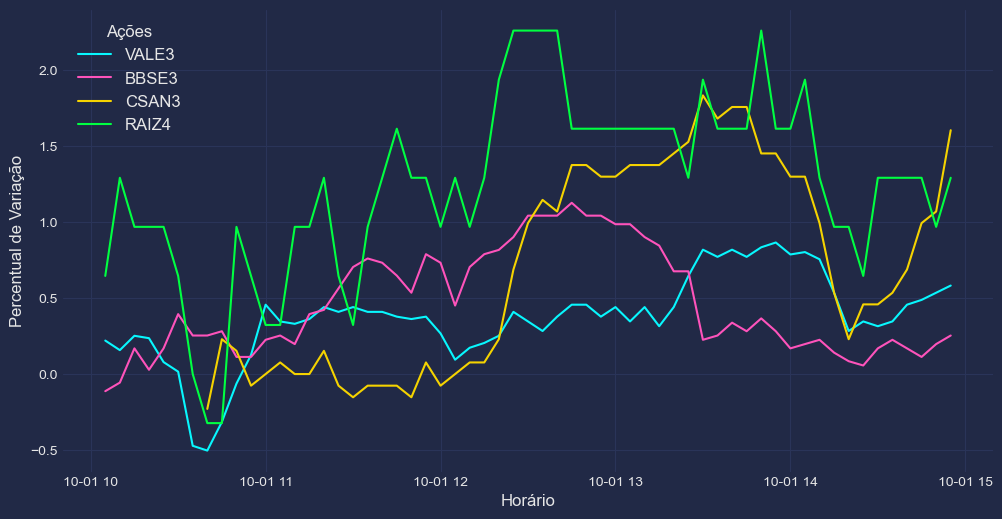

In [69]:
import mplcyberpunk as mp
from colorama import Fore, Style

df = pd.read_csv('df_dia.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['horas'] = df['Datetime'].apply(lambda x: x.strftime("%H:%M"))



lista_acoes = ['VALE3','BBSE3', 'CSAN3', 'RAIZ4', 'BRBI11', 'BBAS3', 'SAPR4', 'SAPR11', 'TRPL4', 'RANI3']

    
# fra = frase + mens_fin
mens = mensagem(df, lista_acoes)
print(mens)


grafico(df, lista_acoes[:4])
plt.savefig('comparação_de_acoes.png')


# Enviar e-mail



# Configurar e enviar e-mail


In [37]:
import win32com.client as win32

In [42]:
outlook = win32.Dispatch("outlook.application")
email = outlook.CreateItem(0)

KeyboardInterrupt: 

In [ ]:
email.To = "rafaelluckner3@gmail.com"
email.Subject = "Seu relatório de Mercado"
email.Body = f'''Prezado cliente, segue o relatório de suas ações:

* O Ibovespa teve o retorno diario de {retorno_ibov}.
* O Dólar teve o retorno diario de {retorno_dolar}.
* O S&P500 teve o retorno diario de {retorno_sp500}.

Segue em anexo a performance dos ativos nos últimos 6 meses.

Att,
Melhor estagiário do mundo


'''
anexo_ibovespa =r"C:\Users\rluckner\Documents\repos\projetos_financeiros\enviar_email\IBOV.png"
anexo_dolar = r"C:\Users\rluckner\Documents\repos\projetos_financeiros\enviar_email\DOLAR.png"
anexo_sp500 = r"C:\Users\rluckner\Documents\repos\projetos_financeiros\enviar_email\S&P500.png"

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)
email.Attachments.Add(anexo_sp500)

email.Send()